# Pre Trained Models for Image Classification – PyTorch for Beginners

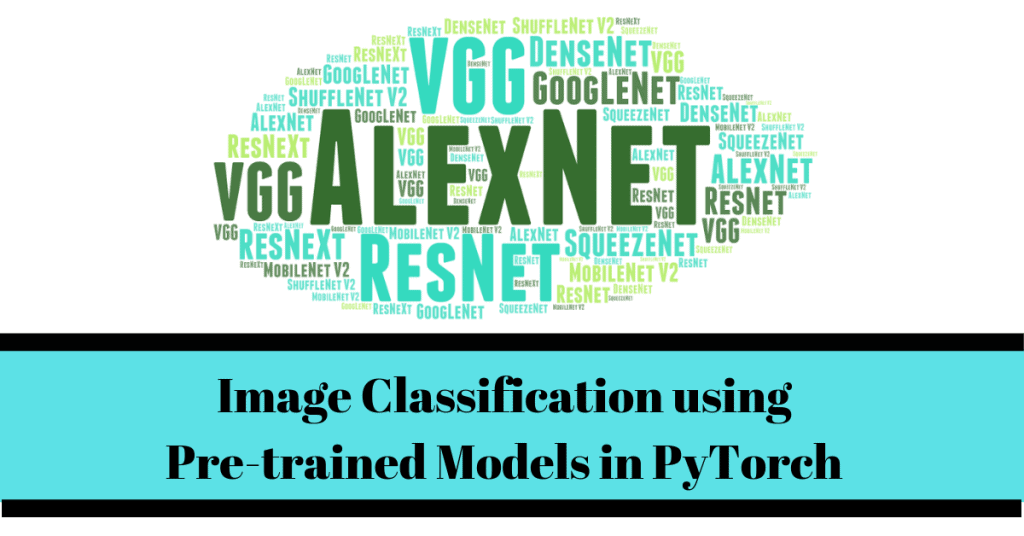

In the previous post, Pytorch Tutorial for beginners, we discussed PyTorch, it’s strengths and why you should learn it. We also had a brief look at Tensors – the core data structure used in PyTorch. In this article, we will jump into some hands-on examples of using pre-trained networks present in TorchVision module – pre trained models for Image Classification.

## Torchvision package

 consists of popular datasets, model architectures, and common image transformations for computer vision. Basically, if you are into Computer Vision and using PyTorch, Torchvision will be of great help!

## 1. Pre trained Models for Image Classification

Pre-trained models are Neural Network models trained on large benchmark datasets like ImageNet. The Deep Learning community has greatly benefitted from these open-source models. Also, the pre-trained models are a major factor for rapid advances in Computer Vision research. Other researchers and practitioners can use these state-of-the-art models instead of re-inventing everything from scratch.


Given below is a rough timeline of how the state-of-the-art models have improved over time. We have included only those models which are present in the Torchvision package.

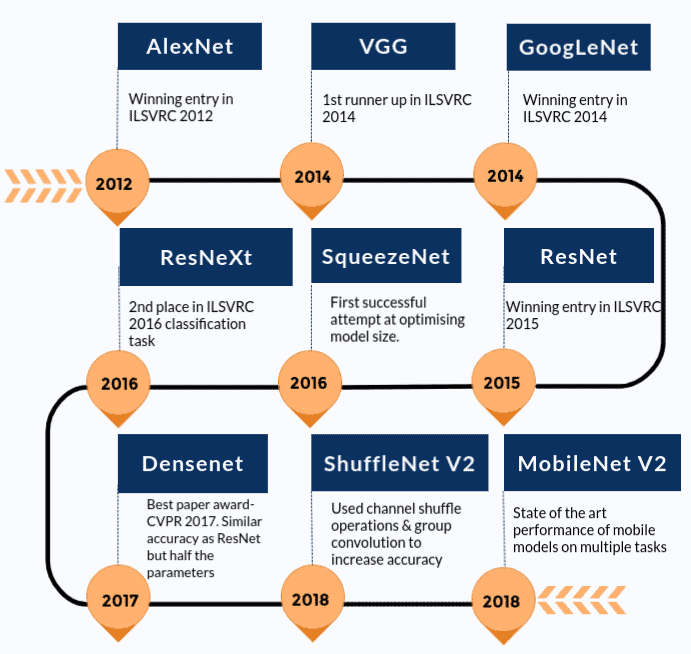

Before we jump into the details of how we can use pre-trained models for image classification, let’s see what the various pre-trained models available are. We will discuss AlexNet and ResNet101 as the two main examples here. Both the networks have been trained on ImageNet dataset.

ImageNet dataset has over 14 million images maintained by Stanford University. It is extensively used for a large variety of Image related deep learning projects. The images belong to various classes or labels. Even though we can use both terms interchangeably, we will stick to classes. The aim of the pre-trained models like AlexNet and ResNet101 is to take an image as an input and predict it’s class

The word pre-trained here means that the deep learning architectures AlexNet and ResNet101, for instance, have been already trained on some (huge) dataset and thus carry the resultant weights and biases with them. This difference between architecture and weights and biases should be very clear because as we will see in the next section, TorchVision has both the architectures and the pre-trained models

## 1.1. Model Inference Process

Since we will focus on how to use the pre-trained models for predicting the class (label) of input, let’s also discuss the process involved in this. This process is referred to as Model Inference. The entire process consists of the following main steps.

1.Reading the input image

2.Performing transformations on the image. For example – resize, center crop, normalization, etc.

3.Forward Pass: Use the pre-trained weights to find out the output vector. Each element in this output vector describes the confidence with which the model predicts the input image belongs to a particular class.

4.Based on the scores obtained (elements of the output vector mentioned in step 3), display the predictions.

# 1.2. Loading Pre-Trained Network using TorchVision

Now that we are equipped with the knowledge of model inference and know what a pre-trained model means, let’s see how we can use them with the help of TorchVision module.

First, let’s install the TorchVision module using the command given below

In [ ]:
!pip install torchvision

Next, let’s import models from torchvision module and see the different models and architectures available to us.

In [ ]:
from torchvision import models
import torch

dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Not so fast! Carefully observe the output that we got above.

Notice that there is one entry called AlexNet and one called alexnet. The capitalized name refers to the Python class (AlexNet) whereas alexnet is a convenience function that returns the model instantiated from the AlexNet class. It’s also possible for these convenience functions to have different parameter sets. For example, densenet121, densenet161, densenet169, densenet201, are all instances of DenseNet class but with a different number of layers – 121,161,169 and 201, respectively

## 1.3. Using AlexNet for Image Classification

Let’s first start with AlexNet. It is one of the early breakthrough networks in Image Recognition. If you are interested in learning about AlexNet’s architecture, you can check out our post on Understanding AlexNet.

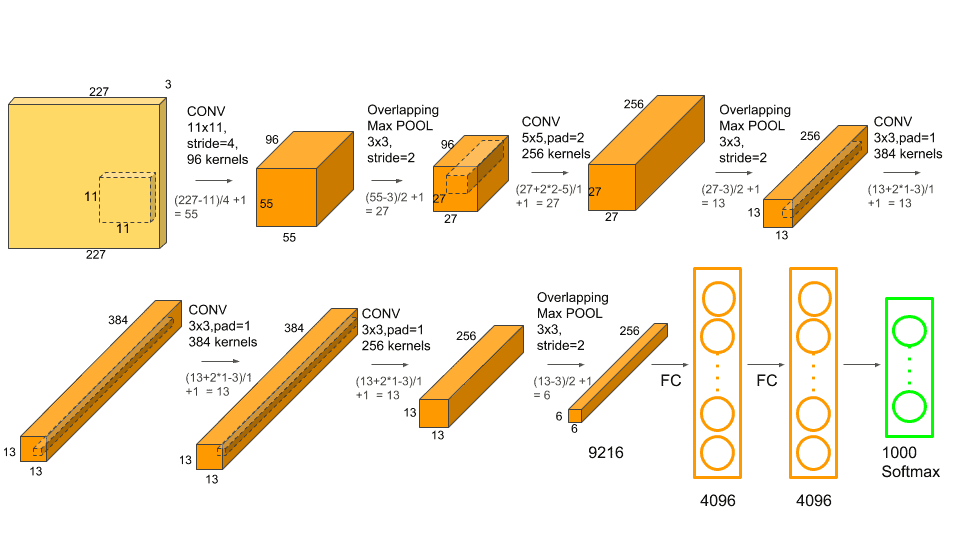

## Step 1: Load the pre-trained model

In the first step, we will create an instance of the network. We’ll also pass an argument so the function can https://github.com/spmallick/learnopencv/tree/master/Inference-for-PyTorch-Models/ONNX-Caffe2d the weights of the model.

In [ ]:
alexnet = models.alexnet(pretrained=True)

# You will see a similar output as below
# Downloading: "https://download.pytorch.org/models/alexnet-owt- 4df8aa71.pth" to /home/hp/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 59.1MB/s]


Note that usually the PyTorch models have an extension of .pt or .pth

Once the weights have been downloaded, we can proceed with the other steps. We can also check out some details of the network’s architecture as follows.

In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Don’t worry about the overflowing output. This basically states the various operations and layers in the AlexNet architecture.

## Step 2: Specify image transformations

Once we have the model with us, the next step is to transform the input image so that they have the right shape and other characteristics like mean and standard deviation. These values should be similar to those used while training the model. This makes sure that the network will produce meaningful answers.

We can pre-process the input image with the help of transforms present in TochVision module. In this case, we can use the following transforms for both AlexNet and ResNet.

In [1]:
import keras
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),
                        strides=(4, 4), activation="relu",
                        input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                        

In [2]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.2 MB/s eta 0:00:00


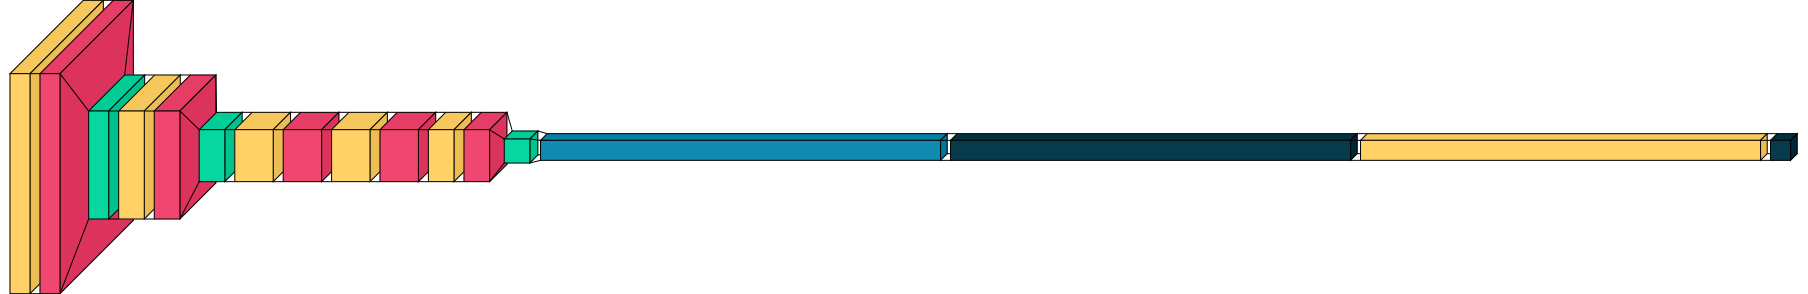

In [3]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

Let’s try to understand what happened in the above code snippet.

Line [1]: Here we are defining a variable transform which is a combination of all the image transformations to be carried out on the input image.

Line [2]: Resize the image to 256×256 pixels.

Line [3]: Crop the image to 224×224 pixels about the center.

Line [4]: Convert the image to PyTorch Tensor data type.

Line [5-7]: Normalize the image by setting its mean and standard deviation to the specified values.

## Step 3: Load the input image and pre-process it

Next, let’s load the input image and carry out the image transformations specified above. Note that we will use Pillow (PIL) module extensively with TorchVision as it’s the default image backend supported by TorchVision.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import Pillow
from PIL import Image
img = Image.open("/content/drive/My Drive/dog.jpg")
#img = Image.open("/content/drive/My Drive/strawberries.jpg")

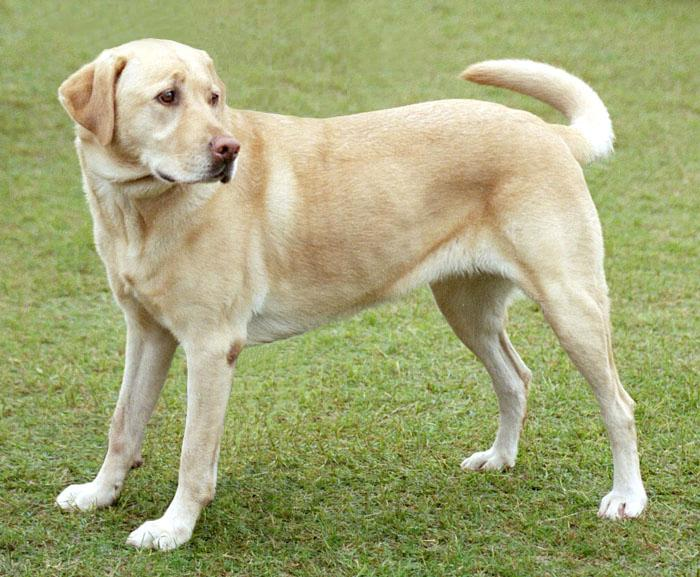

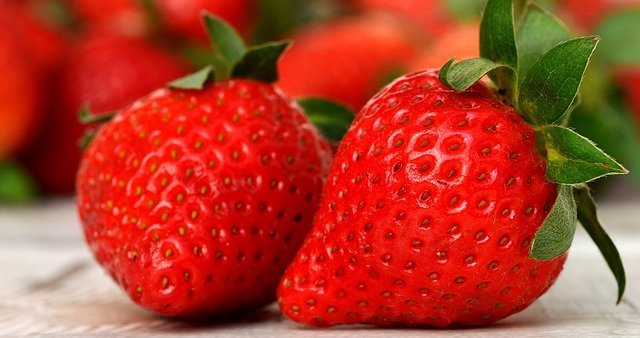

Next, pre-process the image and prepare a batch to be passed through the network.

In [ ]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

## Step 4: Model Inference

Finally, it’s time to use the pre-trained model to see what the model thinks the image is.

First, we need to put our model in eval mode.

In [ ]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Next, let’s carry out the inference.

In [ ]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


This is all good but what do we do with this output vector out with 1000 elements? We still haven’t got the image’s class (or label). For this, we will first read and store the labels from a text file having a list of all the 1000 labels. Note that the line number specified the class number, so it’s very important to ensure that you don’t change that order.

In [ ]:
with open('/content/drive/My Drive/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

Since AlexNet and ResNet have been trained on the same ImageNet dataset, we can use the same classes list for both models.

Now, we need to find the index where the maximum score in output vector out occurs. We will use this index to find out the prediction.

In [ ]:
import json

# Load the labels from a JSON file
with open('/content/drive/My Drive/imagenet-simple-labels.json') as f:
    labels = json.load(f)

In [ ]:
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

Labrador Retriever 42.46733093261719


There we go! The model predicts the image to be of a Labrador Retriever with a 41.58% confidence.

But that sounds too low. Let’s see what other classes the model thought the image belonged to.

In [ ]:
_ , indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Labrador Retriever', 42.46733093261719),
 ('Golden Retriever', 16.60866928100586),
 ('Saluki', 15.473821640014648),
 ('Whippet', 2.7881968021392822),
 ('Ibizan Hound', 2.361705780029297)]

If you are not aware, all these are dog breeds. So the model managed to predict that it was a dog with a fairly high confidence but it was not very sure about the breed of the dog.

Let’s try the same thing for an image of strawberries and a car and see the ouputs we get.

## 1.4. Using ResNet for Image Classification

In [ ]:
# First, load the model
resnet = models.resnet101(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

# Third, carry out model inference
out = resnet(batch_t)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Labrador Retriever', 48.86916732788086),
 ('dingo', 8.17878246307373),
 ('Golden Retriever', 6.944655418395996),
 ('husky', 3.5637450218200684),
 ('Bullmastiff', 3.0799126625061035)]

## 2. Model Comparison

So far we have discussed how we can use pre-trained models to perform image classification but one question that we have yet to answer is how do we decide which model to choose for a particular task. In this section we will compare the pre-trained models based on the following criteria:

1.Top-1 Error: A top-1 error occurs if the class predicted by a model with the highest confidence is not the same as the true class.

2.Top-5 Error: A top-5 error occurs when the true class is not among the top 5 classes predicted by a model (sorted in terms of confidence).

3.Inference Time on CPU: Inference time is the time taken for the model inference step.

4.Inference Time on GPU

5.Model size: Here size stands for the physical space occupied by the .pth file of the pre-trained model supplied by PyTorch

A good model will have low Top-1 error, low Top-5 error, low inference time on CPU and GPU and low model size.

All the experiments were performed on the same input image and multiple times so that the average of all the results for a particular model can be analyzed. The experiments were performed on Google Colab. Now, let’s have a look at the results obtained.

## 2.1. Accuracy Comparison of Models

The first criterion we will discuss consists of Top-1 and Top-5 errors. Top-1 error is when the top predicted class differs from the ground truth. Since the problem is rather a difficult one, there is another error measure called Top-5 error. A prediction is classified as an error if none of the top-5 predicted classes are correct.




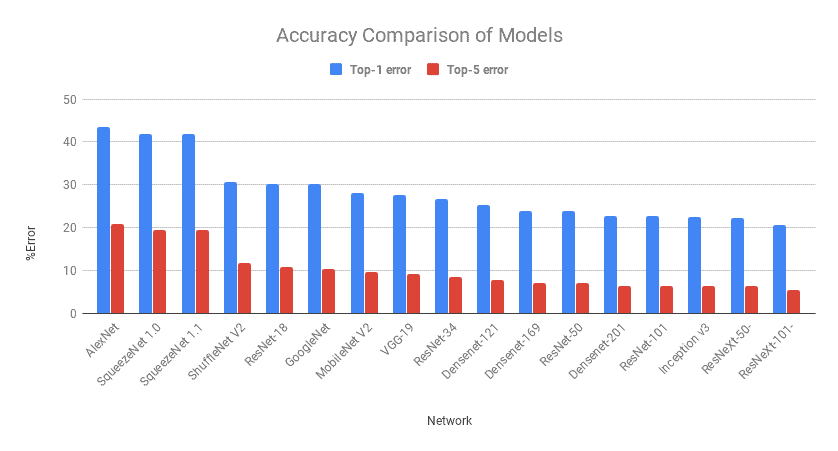

Notice from the graph that both errors follow a similar trend. AlexNet was the first attempt based on Deep Learning and there has been improvement in the error since then. Notable mentions are GoogLeNet, ResNet, VGGNet, ResNext.

## 2.2. Inference Time Comparison


Next, we will compare the models based on the time taken for model inference. One image was supplied to each model multiple times and the inference time for all the iterations was averaged. Similar process was performed for CPU and then for GPU on Google Colab. Even though there are some variations in the order, we can see that SqueezeNet, ShuffleNet and ResNet-18 had a really low inference time, which is exactly what we want.



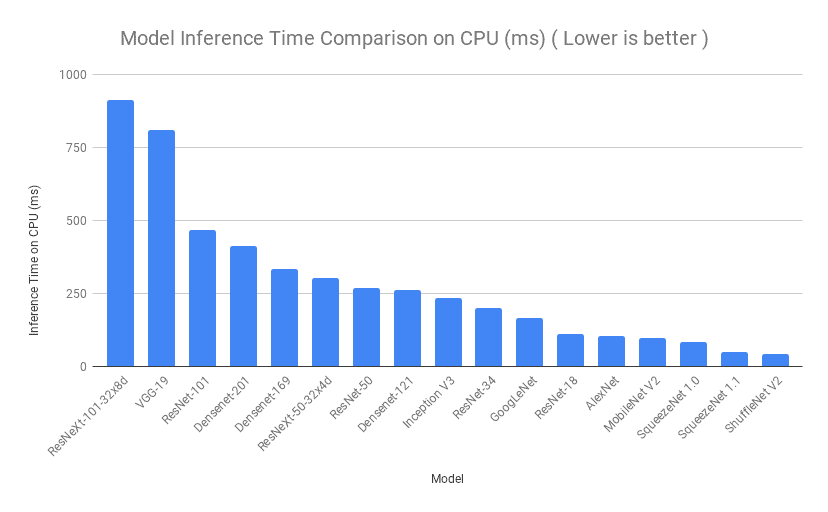

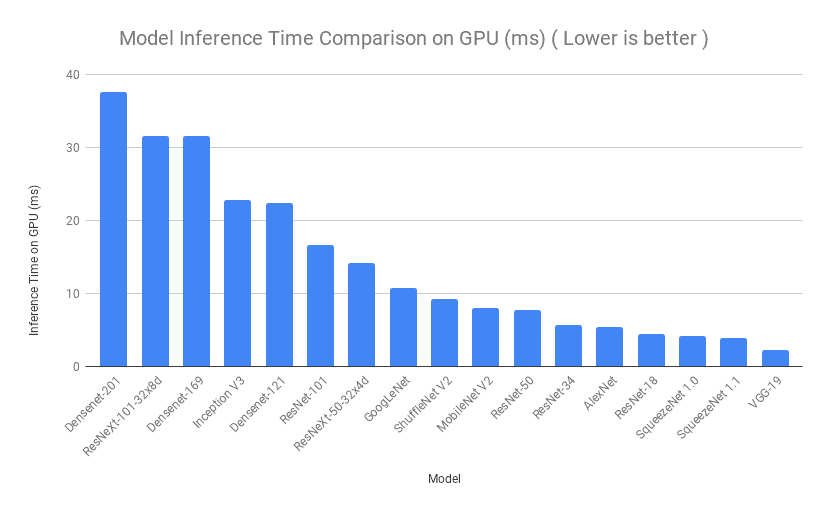

## 2.3. Model Size Comparison

A lot of times when we are using a Deep Learning model on an android or iOS device, the model size becomes a deciding factor, sometimes even more important than accuracy. SqueezeNet has the minimum model size (5 MB), followed by ShuffleNet V2 (6 MB) and MobileNet V2 (14 MB). It’s obvious why these models are preferred in mobile apps utilizing deep learning.

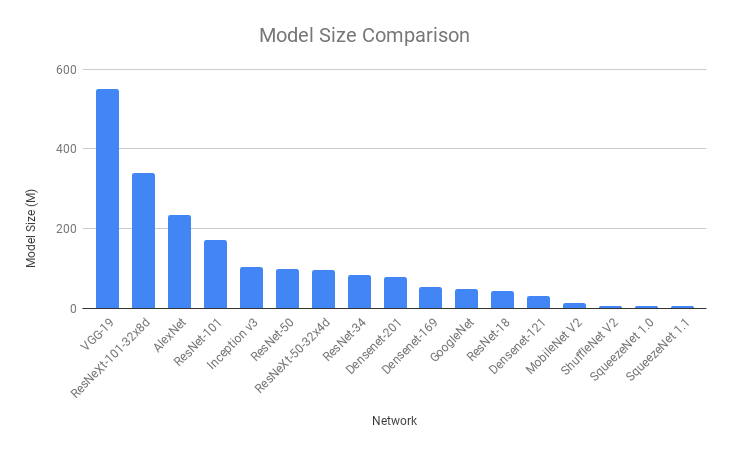

## 2.4. Overall Comparison

We discussed which model performed better based on a particular criterion. We can squeeze all those important details in one bubble chart which we can then refer to for deciding which model to go for based on our requirements.



The x-coordinate we are using is Top-1 error (lower is better). The y-coordinate is the inference time on GPU in milliseconds (lower is better). The bubble size represents the model size (lower is better).



# NOTE :
1. Smaller Bubbles are better in terms of model size.

2. Bubbles near the origin are better in terms of both Accuracy and Speed.

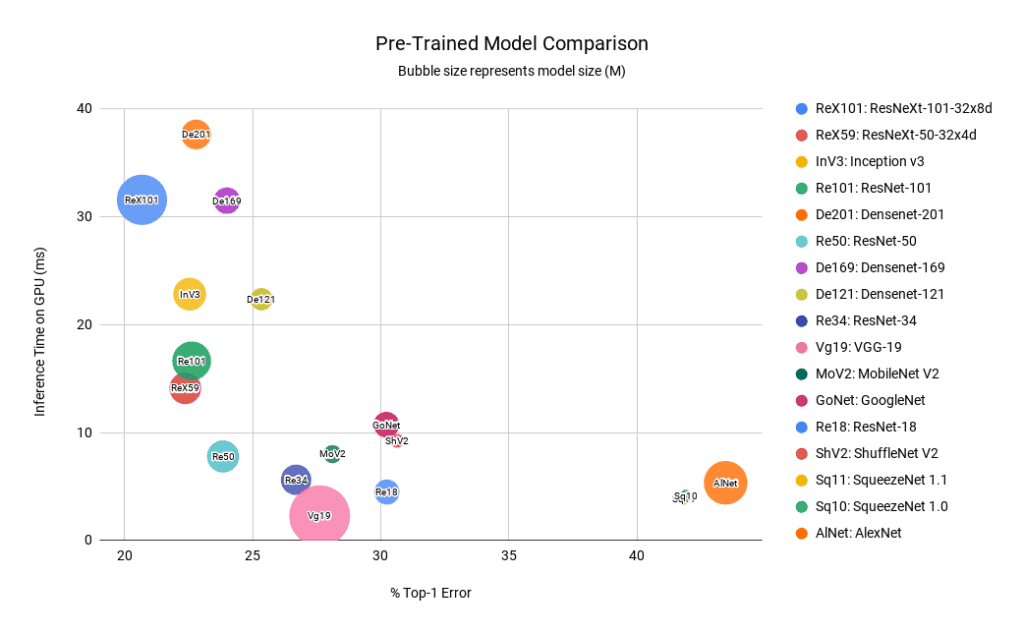

## 3. Final Verdict

* It is clear from the above graph that ResNet50 is the best model in terms of all three parameters ( small in size and closer to origin )

* DenseNets and ResNext101 are expensive on inference time.

* AlexNet and SqueezeNet have pretty high error rate.

# https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/